In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline
app_dir = '/Users/nikhilvs/repos/nyu/covid-19'

In [2]:
df = pd.read_csv(os.path.join(app_dir, 'data/staging', 'jhu_cases.csv'))

In [21]:
country_df = df[df['country'] == 'United States']
cases = country_df['cases']
dates = country_df['date']
dates = np.arange(1, len(dates) + 1)

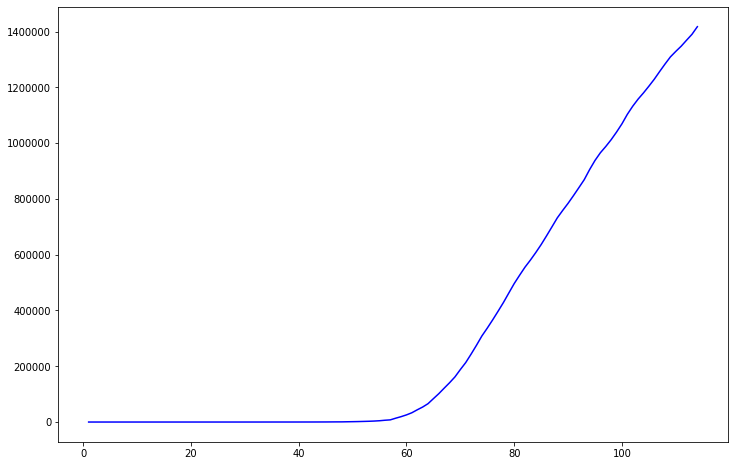

In [22]:
plt.figure(figsize = (12, 8))
plt.plot(dates, cases, 'b-', label='data')

In [23]:
def logistic(t, a, b, c, d):
    return c + (d - c)/(1 + a * np.exp(- b * t))

In [24]:
popt, pcov = curve_fit(logistic, dates, cases, maxfev=10000)

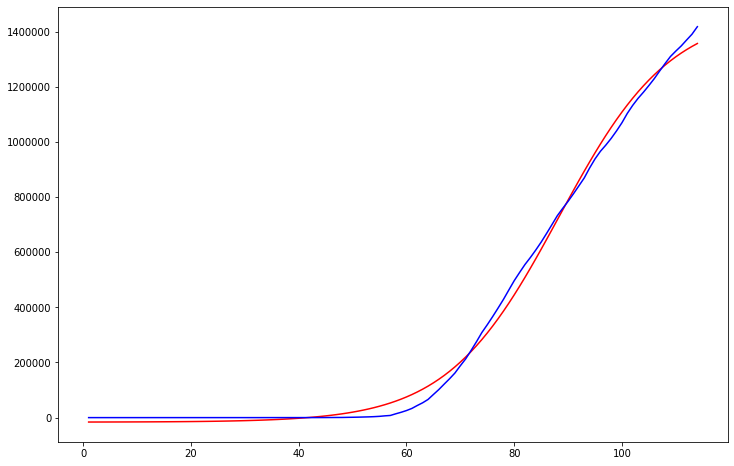

In [25]:
plt.figure(figsize = (12, 8))
plt.plot(dates, logistic(dates, *popt), 'r-')
plt.plot(dates, cases, 'b-', label='data')

In [32]:
import datetime

countries = df['country'].unique()

result_rows = []
base_date = '2020-04-24'
for country in countries:
    country_df = df[df['country'] == country][['date', 'cases']]

    train_country_df = country_df[country_df['date'] <= base_date]
    dates = np.arange(train_country_df.shape[0])
    cases = np.array(train_country_df['cases'])
    popt, pcov = curve_fit(logistic, dates, cases, maxfev=10000000)

    future_dates = np.arange(130)
    logistic_preds = logistic(future_dates, *popt)

    base_date_dt = datetime.datetime.strptime('2020-02-15', '%Y-%m-%d')
    
    i = 0
    for date in future_dates:
        # result_df.append([[country, date, logistic_preds[i]]])
        date_dt = base_date_dt + datetime.timedelta(days = i + 1)
        date_dt_s = date_dt.strftime('%Y-%m-%d')
        result_rows.append([country, date_dt_s, logistic_preds[i]])
        i += 1
    
result_df = pd.DataFrame(result_rows, columns = [
    'country',
    'date',
    'curvefit_preds'
])

In [33]:
result_df[result_df['country'] == 'United States']

,country,date,curvefit_preds
0,United States,2020-02-16,-4882.048391
1,United States,2020-02-17,-4880.583206
2,United States,2020-02-18,-4878.886613
3,United States,2020-02-19,-4876.922065
4,United States,2020-02-20,-4874.647243
...,...,...,...
125,United States,2020-06-20,972619.759515
126,United States,2020-06-21,972773.534516
127,United States,2020-06-22,972906.373764
128,United States,2020-06-23,973021.122980


In [34]:
result_df.to_csv(os.path.join(app_dir, 'data/staging', 'curvefit_preds.csv'), index = False)

In [27]:
country_df = df[df['country'] == 'United States'][['date', 'cases']]
country_subset_df = country_df[0:10]
dates = np.arange(country_subset_df.shape[0])
cases = country_subset_df['cases']
popt, pcov = curve_fit(logistic, dates, cases, maxfev=10000)

future_dates = np.arange(10, 10 + 10)
logistic_preds = logistic(future_dates, *popt)

In [28]:
logistic_preds

array([5.41571672, 5.41571672, 5.41571672, 5.41571672, 5.41571672,
       5.41571672, 5.41571672, 5.41571672, 5.41571672, 5.41571672])

In [31]:
country_df.iloc[0]['date']

'2020-01-22'